# Geometry

In [28]:
# Settings and imports.
%matplotlib inline
from collections import Counter, OrderedDict, defaultdict
from functools import partial
from itertools import count
from math import sqrt, pi, sin, cos, atan, radians, degrees
from random import random
from time import time
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageColor
import seaborn as sns

#sns.set()
#sns.set_context('paper', font_scale=2.0)

-----

# A) Turtle Graphics

TODO: factor out to a reusable module

TODO: return Turtle for better chainin e.g `turtle.forward(10).left(20)` (+ jupyter display to omit show)

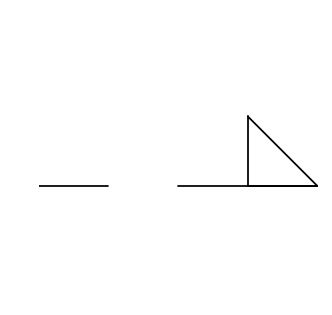

In [2]:
def line(start, end):
    plt.plot([start[0], end[0]], [start[1], end[1]], 'k-')

class Turtle:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.angle = 0  # in radians
        self.is_pendown = True
        self.lines = []
    
    def forward(self, distance):
        nx = self.x + cos(self.angle) * distance
        ny = self.y + sin(self.angle) * distance
        if self.is_pendown:
            self.lines.append(([self.x, self.y], [nx, ny]))
        self.x = nx
        self.y = ny
        
    def back(self, distance):
        self.forward(-distance)
        
    def left(self, degrees):
        radians = degrees * pi/180
        self.angle += radians
        
    def right(self, degrees):
        self.left(-degrees)
    
    def penup(self):
        self.is_pendown = False
        
    def pendown(self):
        self.is_pendown = True
        
    def show(self, size=5, axis=False):
        plt.figure(figsize=[size,size])
        plt.axis('equal')
        if not axis:
            plt.axis('off')
        for start, end in self.lines:
            line(start, end)
        
              
turtle = Turtle()
turtle.forward(1)
turtle.penup()
turtle.forward(1)
turtle.pendown()
turtle.forward(2)
turtle.back(1)
turtle.left(90)
turtle.forward(1)
turtle.right(135)
turtle.forward(sqrt(2))
turtle.show()

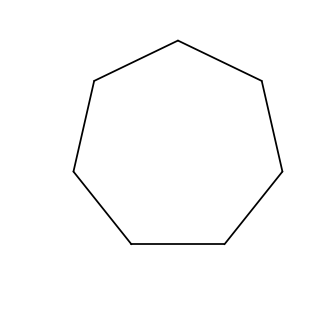

In [3]:
def polygon(turtle, n, a=1):
    for i in range(n):
        turtle.forward(a)
        turtle.left(360 / n)
    return turtle
           
polygon(Turtle(), 7).show()

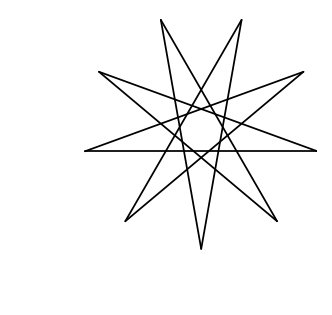

In [4]:
def star(turtle, n, skip, a=1):
    for i in range(n):
        turtle.forward(a)
        turtle.left(360 * skip / n)
    return turtle
           
star(Turtle(), 9, 4).show()

-----

# B) Relative vs. Absolute Drawing

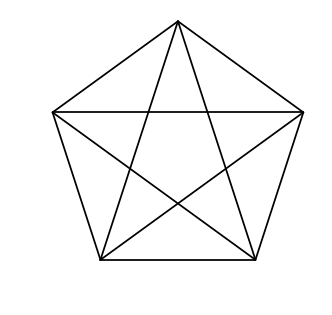

In [5]:
def pentagon_rel():
    turtle = Turtle()
    polygon(turtle, 5)
    turtle.left(360/10)
    length = 2 * sin((pi - 2*pi / 5)/2)  # TODO: simplify + use radians
    star(turtle, 5, 2, length)
    turtle.show()
    
pentagon_rel()

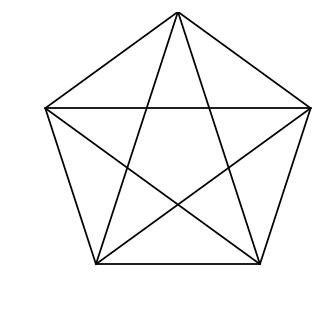

In [6]:
def create_figure():
    plt.figure(figsize=[5,5])
    plt.axis('off')
    plt.axis('equal')

def pentagon_abs():
    create_figure()
    angles = [radians(90 + i * 360/5) for i in range(5)]
    vertices = [(cos(angle), sin(angle)) for angle in angles]
    for i in range(5):
        line(vertices[i], vertices[(i+1) % 5])
        line(vertices[i], vertices[(i+2) % 5])
    
pentagon_abs()

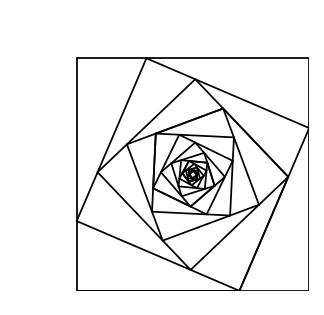

In [26]:
# Relative drawing
def nested_squares(n, length=1, shift=0.7):
    turtle = Turtle()
    angle = degrees(atan(shift/(1-shift)))
    for i in range(n):
        polygon(turtle, 4, a=length)
        turtle.forward(shift * length)
        turtle.left(angle)
        length = shift * length / sin(radians(angle))       
    turtle.show()

nested_squares(15)

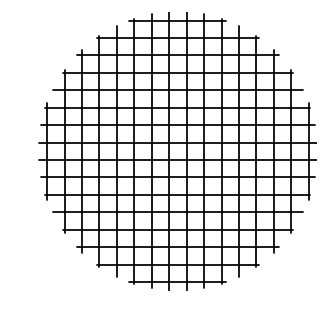

In [32]:
# Absolute drawing
def grid_circle(n_lines=16, radius=1):
    create_figure()
    step = 2 * radius / (n_lines - 1)
    mid_line = (n_lines - 1) / 2
    for i in range(n_lines):
        dist1 = radius * 2 * (i - mid_line) / n_lines
        dist2 = sqrt(radius**2 - dist1**2) 
        line([-dist2, dist1], [dist2, dist1])
        line([dist1, -dist2], [dist1, dist2])   
    
grid_circle()

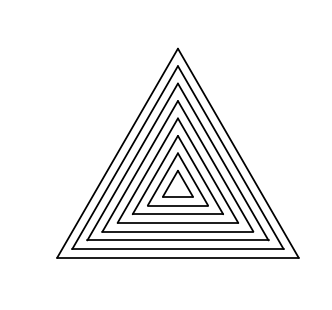

In [38]:
# Absolute drawing
def centered_equilateral_triangle(length):
    angles = [radians(90 + i * 120) for i in range(3)]
    vertices = [
        (cos(angle) * length, sin(angle) * length)
        for angle in angles]
    for i in range(3):
        line(vertices[i], vertices[(i+1) % 3])
    
    
def nested_triangles(n=8, length=1):
    create_figure()
    for i in range(n+1):
        centered_equilateral_triangle(length * i / n)
        

nested_triangles()

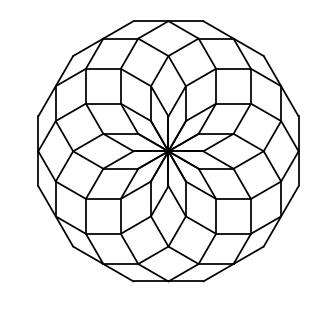

In [49]:
# Relative drawing
def multipolygon(n, length=1):
    turtle = Turtle()
    angle = 360 / n
    for i in range(n):
        polygon(turtle, n, a=length)
        turtle.left(angle)     
    turtle.show()

multipolygon(12)

-----

# C) Fractals

TODO

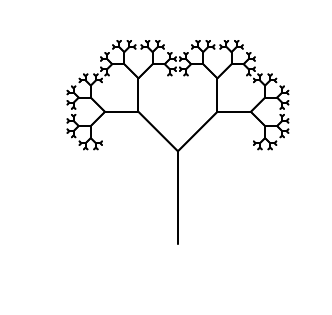

In [54]:
def tree_rec(turtle, n, length=1, shrinking=0.6):
    if n == 0:
        return turtle
    turtle.forward(length)
    turtle.left(45)
    tree_rec(turtle, n-1, length * shrinking)
    turtle.right(90)
    tree_rec(turtle, n-1, length * shrinking)
    turtle.left(45)
    turtle.back(length)
    return turtle

def tree(n=8):
    turtle = Turtle()
    turtle.left(90)
    turtle = tree_rec(turtle, n)
    turtle.show()

tree()

-----

# D) Creative Turlte

TODO